# Búsqueda de datos
- Uso de where, endswith, replace.

## Código anterior

In [1]:
import pandas as pd
import numpy as np
import os

os.chdir('/users/memobarbosa/Análisis de datos/Parte 2/M16 - Data Massaging 1')

df = pd.read_csv('netflix_titles.csv')
df["duration_num"] = df["duration"]
df["duration_unit"] = ""

stringcols = df.select_dtypes(include="object").columns
df[stringcols] = df[stringcols].fillna("").astype(pd.StringDtype())

In [2]:
# Luego se buscarán los registros que tengan "min" y, con ellos, se asignarán valores a la columna "duration_unit"
# El primer paso es definir a todas las unidades como "min", luego esto se cambiará
df["duration_unit"] = "min"
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_num,duration_unit
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90 min,min
1,s2,TV Show,Blood & Water,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2 Seasons,min
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1 Season,min


In [3]:
# Usando where asignamos la duration_unit a min cuando es "min" y a "season" cuando es <> min
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.where.html
df["duration_unit"] = df["duration_unit"].where(df.duration_num.str.endswith("min"), "season")

# Se puede ver parte de un dataframe que no sea el head o tail con sample
df.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_num,duration_unit
2149,s2150,Movie,We Summon the Darkness,Marc Meyers,"Alexandra Daddario, Amy Forsyth, Keean Johnson...","United States, Canada, United Kingdom","August 8, 2020",2020,R,90 min,"Horror Movies, Thrillers",A night at a 1980s heavy metal concert hits a ...,90 min,min
8011,s8012,Movie,SHOT! The Psycho-Spiritual Mantra of Rock,Barney Clay,Mick Rock,"United Kingdom, United States","August 10, 2017",2016,TV-MA,98 min,"Documentaries, Music & Musicals",Aptly named iconic rock photographer Mick Rock...,98 min,min
5646,s5647,Movie,Jen Kirkman: Just Keep Livin’?,Lance Bangs,Jen Kirkman,United States,"January 3, 2017",2017,TV-MA,69 min,Stand-Up Comedy,Incisive comic Jen Kirkman gets real about wom...,69 min,min
7565,s7566,Movie,Natsamrat - Asa Nat Hone Nahi,Mahesh Manjrekar,"Nana Patekar, Medha Manjrekar, Mrinmayee Deshp...",India,"June 1, 2018",2016,TV-14,165 min,"Dramas, International Movies",A veteran Shakespearean actor steps off the st...,165 min,min
3848,s3849,TV Show,Cinta Teruna Kimchi,,"Nazim Othman, Johan As'ari, Nur Risteena, Nien...",,"May 8, 2019",2016,TV-PG,1 Season,"International TV Shows, TV Dramas",When a young man determines to discover his fa...,1 Season,season


In [4]:
# Se usa el método de replace para el reemplazo de los strings
# En este caso se reemplazan todas las ocurrencias de min, Season y Seasons por blancos
df["duration_num"] = df["duration_num"].replace({" min": "", " Season": "", " Seasons": "", "s": ""}, regex=True)
df.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_num,duration_unit
3866,s3867,Movie,The Last Summer,William Bindley,"K.J. Apa, Maia Mitchell, Tyler Posey, Jacob La...",United States,"May 3, 2019",2019,TV-14,110 min,"Comedies, Romantic Movies",Teens from a Chicago high school grapple with ...,110,min
6154,s6155,Movie,An American Tail: The Treasures of Manhattan I...,Larry Latham,"Thomas Dekker, Dom DeLuise, Pat Musick, Nehemi...",United States,"April 1, 2018",2000,G,79 min,Children & Family Movies,When Fievel and friends go hunting for buried ...,79,min
1482,s1483,TV Show,Transformers: War for Cybertron: Earthrise,,"Jake Foushee, Jason Marnocha, Linsay Rousseau,...",,"December 30, 2020",2020,TV-Y7,1 Season,Anime Series,While Megatron takes drastic measures to save ...,1,season
2966,s2967,TV Show,Pop Team Epic,,,Japan,"February 1, 2020",2018,TV-14,1 Season,"Anime Series, International TV Shows",This animated adaptation of the quirky four-pa...,1,season
1219,s1220,Movie,You're Everything To Me,Tolga Örnek,"Tolga Çevik, Cengiz Bozkurt, Melis Birkan, Tun...",Turkey,"March 12, 2021",2016,TV-PG,107 min,"Comedies, Dramas, Independent Movies",When an old fling shows up with their infant c...,107,min


In [6]:
# Se valida el contenido y el split que se hizo de la columna
df[["show_id", "type", "duration", "duration_num", "duration_unit"]].sample(100)

# Nota: se podía haber utilizado .split también, pero se quería recorrer algunos comandos más

,show_id,type,duration,duration_num,duration_unit
2964,s2965,Movie,59 min,59,min
1532,s1533,TV Show,1 Season,1,season
1330,s1331,Movie,108 min,108,min
4548,s4549,Movie,94 min,94,min
7295,s7296,TV Show,3 Seasons,3,season
...,...,...,...,...,...
5278,s5279,TV Show,1 Season,1,season
5532,s5533,Movie,92 min,92,min
129,s130,Movie,108 min,108,min
862,s863,TV Show,2 Seasons,2,season


In [7]:
# Se cambia el tipo de columna de duration_num a numérico
df["duration_num"] = pd.to_numeric(df["duration_num"])
df.dtypes

show_id          string[python]
type             string[python]
title            string[python]
director         string[python]
cast             string[python]
country          string[python]
date_added       string[python]
release_year              int64
rating           string[python]
duration         string[python]
listed_in        string[python]
description      string[python]
duration_num            Float64
duration_unit            object
dtype: object

In [8]:
# Una vez con la columna en numérico, se le visualiza en el describe()
df.describe()

,release_year,duration_num
count,8807.000000,8804.0
mean,2014.180198,69.846888
std,8.819312,50.814828
min,1925.000000,1.0
25%,2013.000000,2.0
50%,2017.000000,88.0
75%,2019.000000,106.0
max,2021.000000,312.0


In [9]:
# Quiero saber qué registros tienen duration_num como NaN, deberían ser 3
df.loc[df["duration_num"].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_num,duration_unit
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,,Movies,"Louis C.K. muses on religion, eternal love, gi...",<NA>,season
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,,Movies,Emmy-winning comedy writer Louis C.K. brings h...,<NA>,season
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,,Movies,The comic puts his trademark hilarious/thought...,<NA>,season


In [10]:
# En la importación, para 3 películas, se asignó la duración al rating
# También podría verlos por ID: df.loc[df["show_id"] == "s5542"]
# Con la función at, puedo hacer los cambios de una manera 100% manual
# Si bien no es escalable a grandes cantidades de registros, es muy útil para cambios pequeños
df.at[5541, "duration_unit"] = "min"
df.at[5794, "duration_unit"] = "min"
df.at[5813, "duration_unit"] = "min"

df.at[5541, "duration_num"] = 74
df.at[5794, "duration_num"] = 84
df.at[5813, "duration_num"] = 66

df.at[5541, "duration"] = "74 min"
df.at[5794, "duration"] = "84 min"
df.at[5813, "duration"] = "66 min"

# Se busca los nulos
df.loc[df["duration_num"].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_num,duration_unit


In [11]:
# Se hace un describe()
df.describe()

,release_year,duration_num
count,8807.000000,8807.0
mean,2014.180198,69.84853
std,8.819312,50.806431
min,1925.000000,1.0
25%,2013.000000,2.0
50%,2017.000000,88.0
75%,2019.000000,106.0
max,2021.000000,312.0


<Axes: ylabel='Frequency'>

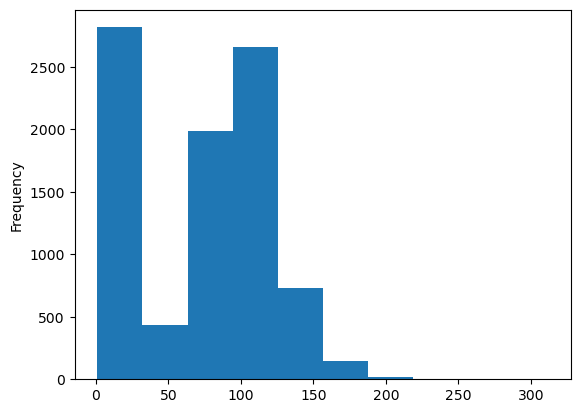

In [12]:
df.duration_num.plot.hist()